#**Title & Introduction**

# Project 1: Workplace Injury Analytics Using the CRISP-DM Lifecycle

This notebook applies the full Data Science Lifecycle to a workplace incident dataset.  
The aim is to understand the structure of the data, prepare it for analysis, explore key patterns, and build simple predictive models.  
The workflow follows the CRISP-DM framework, aligning with the requirements of my MEng Data Science coursework.


**Setup & Clone Repo**

In [3]:
# 0. Setup: clone repo and move into it

from google.colab import drive
drive.mount('/content/drive')

REPO_URL = "https://github.com/karabopaulmabote-sys/project-1-crispdm-injury-analysis.git"

!git clone {REPO_URL}
%cd project-1-crispdm-injury-analysis

!ls

Mounted at /content/drive
Cloning into 'project-1-crispdm-injury-analysis'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 55 (delta 20), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (55/55), 46.98 KiB | 3.92 MiB/s, done.
Resolving deltas: 100% (20/20), done.
/content/project-1-crispdm-injury-analysis
data  LICENSE  notebooks  README.md  requirements.txt


#**Step 1: Business Understanding**

# 1. Business Understanding

This project focuses on analysing workplace accident records to understand the factors that relate to incident severity. The dataset includes incidents from different industries and provinces, with details such as accident type, company ownership, and the number of injuries or fatalities. The goal is to classify the severity of an incident based on these recorded characteristics.

The main motivation is to see how incident data can support decision-making in safety management. By identifying patterns linked to severe incidents, it becomes easier to understand which combinations of conditions or accident types pose higher risks. This classification task also provides an opportunity to apply the data science lifecycle in a clear and structured way.

Key questions guiding this phase include:
- Which incident characteristics are associated with severe outcomes?
- Are certain industries or provinces more likely to have high-severity incidents?
- Can a simple classification model predict incident severity based on available attributes?

This understanding informs how the data will be prepared, how the severity classes are defined, and which modelling techniques are appropriate for the analysis.


#**Step 2: Data Understanding**

# 2. Data Understanding

The goal of this step is to understand what the accident dataset contains and how it is structured. The dataset records workplace incidents across provinces, industries, company types, and incident categories. Each row represents a single incident and includes details such as the number of deaths, injuries, penalties, and the location of the event.

At this stage, the focus is on:
- Inspecting the structure and size of the dataset  
- Understanding the variables available  
- Identifying categorical and numerical fields  
- Checking for missing or inconsistent entries  
- Getting an initial feel for accident types and severity-related information  

This helps establish what preparation steps are needed before creating the severity classes for modelling.

**Imports & Load Data**

In [4]:
# 2. Data Understanding - load and inspect data

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/project-1-crispdm-injury-analysis/data/accidents.csv")

# Show shape and first rows
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (279, 14)


,Title,Date,Description,Province,City,Industry,Sub Industry,Company Name,Company Ownership,Type,Number of Deaths,Number of Injuries,Number of Punished,Financial Penalty
0,"A building caught fire in Dalian, Liaoning",2021-08-27,"A building caught fire in Dalian, Liaoning",Liaoning,Dalian,Construction,NaN,NaN,Unknown,Fire,0,0,0,0
1,A construction site caught fire in Beijing,2021-08-26,A construction site caught fire in Beijing,Beijing,NaN,Construction,NaN,NaN,Unknown,Fire,0,0,0,0
2,Four injured after collapse at a highway site ...,2021-08-23,Four injured after collapse at a highway site ...,Yunnan,Honghe,Construction,NaN,NaN,Unknown,Falling/Structural failure,0,1-9,0,0
3,"One dead in accident at a coal mine in Baotou,...",2021-08-21,"One dead in accident at a coal mine in Baotou,...",Neimenggu,Baotou,Coal mining,NaN,NaN,Private Enterprise,Structural failure,1-9,0,0,0
4,A factory of Taiyuan Steel caught fire after t...,2021-08-21,A factory of Taiyuan Steel caught fire after t...,Shanxi,Taiyuan,Industrial(iron and steel),NaN,NaN,SOE,Fire,0,0,0,0


**Basic Structure & Missingness**

In [5]:
# Inspect column names and types
print("Columns:\n", df.columns.tolist())
print("\nInfo:")
df.info()

# Check missing values
print("\nMissing values per column:")
df.isna().sum()

Columns:
 ['Title', 'Date', 'Description', 'Province', 'City', 'Industry', 'Sub Industry', 'Company Name', 'Company Ownership', 'Type', 'Number of Deaths', 'Number of Injuries', 'Number of Punished', 'Financial Penalty']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               279 non-null    object 
 1   Date                279 non-null    object 
 2   Description         279 non-null    object 
 3   Province            279 non-null    object 
 4   City                276 non-null    object 
 5   Industry            279 non-null    object 
 6   Sub Industry        1 non-null      object 
 7   Company Name        0 non-null      float64
 8   Company Ownership   278 non-null    object 
 9   Type                276 non-null    object 
 10  Number of Deaths    279 non-null    object 
 11  Number of Injuries  279 n

,0
Title,0
Date,0
Description,0
Province,0
City,3
Industry,0
Sub Industry,278
Company Name,279
Company Ownership,1
Type,3


**Categorical Summary**

In [6]:
# Inspect unique values for key categorical columns
categorical_cols = [
    "Province", "City", "Industry", "Sub Industry",
    "Company Ownership", "Type",
    "Number of Deaths", "Number of Injuries"
]

for col in categorical_cols:
    if col in df.columns:
        print(f"\n--- {col} ---")
        print(df[col].value_counts().head(10))


--- Province ---
Province
Zhejiang     24
Guangdong    23
Shanxi       21
Tianjin      20
Neimenggu    17
Sichuan      17
Henan        14
Beijing      13
Liaoning     11
Jiangsu      10
Name: count, dtype: int64

--- City ---
City
Tianjing     20
Beijing      12
Shenzhen      8
Hangzhou      7
Lvliang       7
Zhengzhou     6
Wuhan         5
Shenyang      5
Ningbo        4
Baotou        4
Name: count, dtype: int64

--- Industry ---
Industry
Construction                  100
Coal mining                    35
Industrial(iron and steel)     33
Storage/Logistics              32
Repair/maintenance             28
Other                          27
Manufacturing                  23
Other mining industry           1
Name: count, dtype: int64

--- Sub Industry ---
Sub Industry
Sanitation workers    1
Name: count, dtype: int64

--- Company Ownership ---
Company Ownership
Private Enterprise    125
Unknown               100
SOE                    42
Public Institution      7
Foreign                

**Summary of Severity-Related Variables**

In [7]:
# Quick glance at severity-related fields
print("\nUnique values for Number of Deaths:")
print(df["Number of Deaths"].unique())

print("\nUnique values for Number of Injuries:")
print(df["Number of Injuries"].unique())


Unique values for Number of Deaths:
['0' '1-9' '10-29']

Unique values for Number of Injuries:
['0' '1-9' '10-29' '50+']


#**Step 3: Data Preparation**

# 3. Data Preparation

This step focuses on cleaning the dataset and preparing it for analysis and modelling. Several fields are not required for the severity classification task, including city, sub-industry, company name, and ownership. These columns are removed to simplify the feature set.  

Rows that do not contain a valid incident type are also removed, since incident type is a key feature.  

The preparation process includes:
- Removing unused and irrelevant columns  
- Handling missing values  
- Standardising text fields  
- Converting injury and fatality ranges into numeric categories  
- Creating the three-class severity label  
- Identifying the final modelling features  

This prepares a clean dataset that supports meaningful EDA and classification.


In [9]:
# 3. Data Preparation – basic cleaning

# Work on a copy
data = df.copy()
print("Initial shape:", data.shape)

Initial shape: (279, 14)


**Clean Column Names**

In [10]:
# Standardise column names
data.columns = (
    data.columns
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
    .str.replace("/", "_")
)

data.columns

Index(['title', 'date', 'description', 'province', 'city', 'industry',
       'sub_industry', 'company_name', 'company_ownership', 'type',
       'number_of_deaths', 'number_of_injuries', 'number_of_punished',
       'financial_penalty'],
      dtype='object')

**Drop Unwanted Columns**

In [11]:
cols_to_drop = ["city", "sub_industry", "company_name", "company_ownership"]

for col in cols_to_drop:
    if col in data.columns:
        data = data.drop(columns=col)

print("After dropping unused columns:", data.shape)

After dropping unused columns: (279, 10)


**Drop Rows with Missing Incident Type**

In [12]:
data = data.dropna(subset=["type"])
print("After dropping missing type rows:", data.shape)

After dropping missing type rows: (276, 10)


**Standardise Remaining Categorical Fields**

In [13]:
cat_cols = ["province", "industry", "type"]

for col in cat_cols:
    if col in data.columns:
        data[col] = (
            data[col]
            .astype(str)
            .str.strip()
            .str.title()
        )

**Convert Injury/Death Ranges to Ordinals**

In [14]:
def convert_range(value):
    value = str(value).strip()

    if value == "0":
        return 0

    if value in ["1-9", "1 - 9"]:
        return 1

    if value in ["10-29", "10 - 29"]:
        return 2

    if value in ["50+", "50 +"]:
        return 3

    return None

data["deaths_num"] = data["number_of_deaths"].apply(convert_range)
data["injuries_num"] = data["number_of_injuries"].apply(convert_range)

data[["number_of_deaths","deaths_num","number_of_injuries","injuries_num"]].head()

,number_of_deaths,deaths_num,number_of_injuries,injuries_num
0,0,0,0,0
1,0,0,0,0
2,0,0,1-9,1
3,1-9,1,0,0
4,0,0,0,0


**Create the Three-Class Severity Variable**

In [15]:
def severity_class(row):
    deaths = row["deaths_num"]
    injuries = row["injuries_num"]

    # High severity (deaths or many injuries)
    if deaths >= 1 or injuries >= 2:
        return 2

    # Moderate severity (non-fatal but multiple injuries)
    if deaths == 0 and injuries == 1:
        return 1

    # Low severity
    return 0

data["severity"] = data.apply(severity_class, axis=1)
data["severity"].value_counts()

,count
severity,
2,145
0,83
1,48


**Drop Redundant Columns**

In [17]:
drop_cols = [
    "title",
    "description",
    "number_of_deaths",
    "number_of_injuries",
    "date",
    "province"
]

data = data.drop(columns=[c for c in drop_cols if c in data.columns])
data.head()

,industry,type,number_of_punished,financial_penalty,deaths_num,injuries_num,severity
0,Construction,Fire,0,0,0,0,0
1,Construction,Fire,0,0,0,0,0
2,Construction,Falling/Structural Failure,0,0,0,1,1
3,Coal Mining,Structural Failure,0,0,1,0,2
4,Industrial(Iron And Steel),Fire,0,0,0,0,0


**Final Feature Set**

In [18]:
categorical_features = ["industry", "type"]
numeric_features = ["deaths_num", "injuries_num"]
target = "severity"

print("Categorical features:", categorical_features)
print("Numeric features:", numeric_features)
print("Target:", target)

Categorical features: ['industry', 'type']
Numeric features: ['deaths_num', 'injuries_num']
Target: severity


**Encode Categorical Features**

In [30]:
from sklearn.preprocessing import LabelEncoder

X_encoded = X.copy()
label_encoders = {}

for col in X_encoded.columns:
    if X_encoded[col].dtype == "object":
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
        label_encoders[col] = le

# Encode target as well (classification)
y_encoded = y.astype(str)
target_le = LabelEncoder()
y_encoded = target_le.fit_transform(y_encoded)

print("Encoded features shape:", X_encoded.shape)
print("Encoded target classes:", list(target_le.classes_)[:10])

Encoded features shape: (0, 12)
Encoded target classes: []


#**Step 4: Exploratory Data Analysis (EDA)**

# 4. Exploratory Data Analysis (EDA)

This step focuses on understanding how incident characteristics relate to severity, injuries, and fatalities. The aim is to explore patterns in incident type, industry, and numerical severity indicators before building the classification model.  

The analysis includes:
- Distribution of the three severity classes  
- Patterns across incident types  
- Industry trends  
- Injury and fatality distributions  
- Relationships between incident categories and severity  
- Basic correlation checks for numerical fields  

These visuals help identify which factors may contribute most to incident severity and guide expectations before modelling.

**Severity Class Distribution**

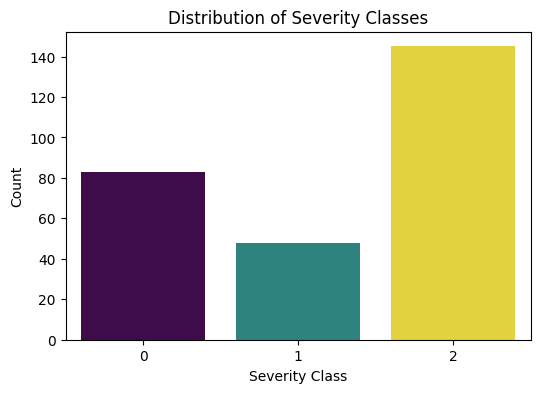

,count
severity,
2,145
0,83
1,48


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=data, x="severity", hue="severity", palette="viridis",
              legend=False)
plt.title("Distribution of Severity Classes")
plt.xlabel("Severity Class")
plt.ylabel("Count")
plt.show()

data["severity"].value_counts()

**Severity by Incident Type**

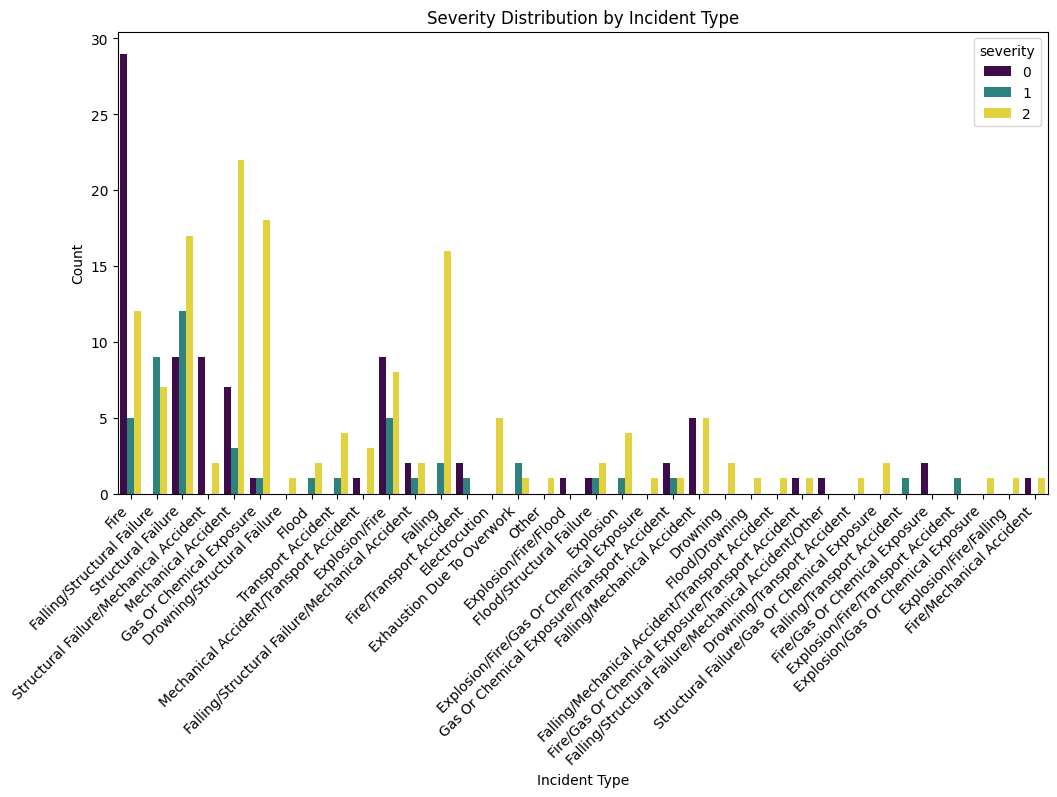

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(
    data=data,
    x="type",
    hue="severity",
    palette="viridis"
)
plt.xticks(rotation=45, ha="right")
plt.title("Severity Distribution by Incident Type")
plt.xlabel("Incident Type")
plt.ylabel("Count")
plt.show()


**Severity by Industry**

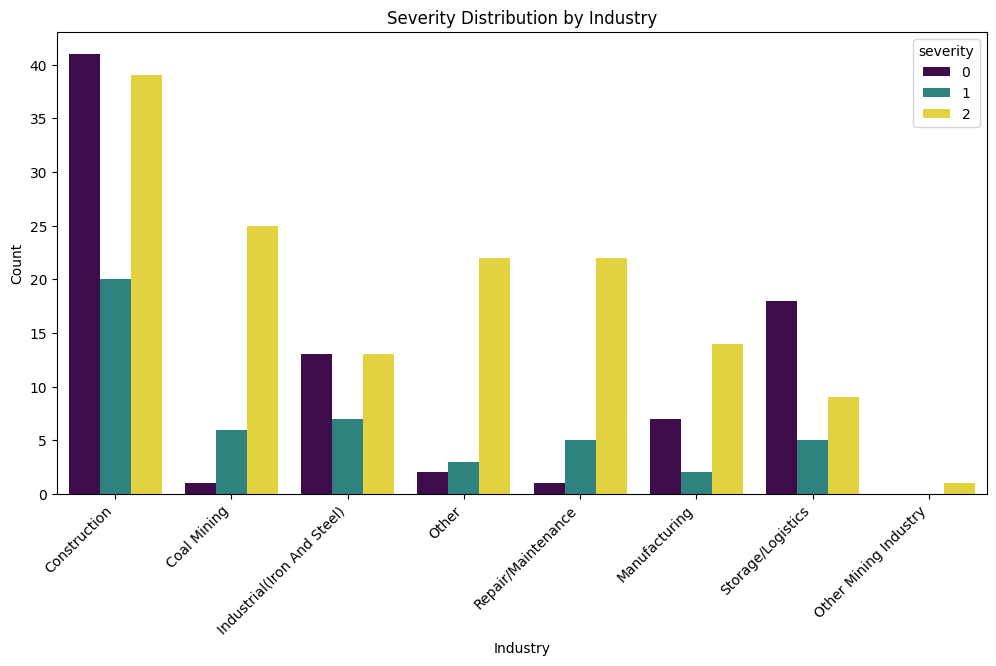

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(
    data=data,
    x="industry",
    hue="severity",
    palette="viridis"
)
plt.xticks(rotation=45, ha="right")
plt.title("Severity Distribution by Industry")
plt.xlabel("Industry")
plt.ylabel("Count")
plt.show()

**Injury & Death Ordinal Distributions**

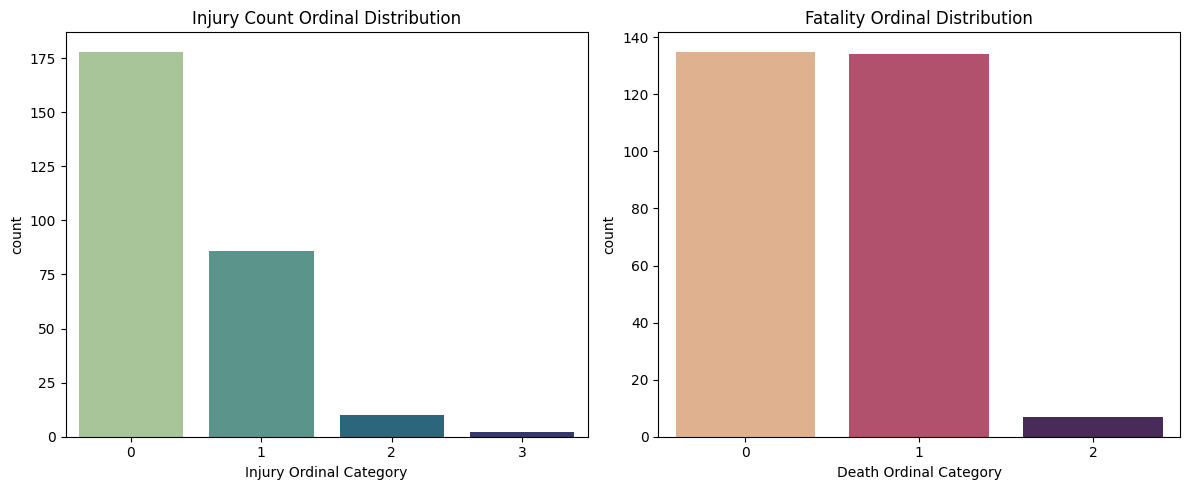

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.countplot(
    data=data,
    x="injuries_num",
    hue="injuries_num",
    palette="crest",
    legend=False,
    ax=axes[0]
)
axes[0].set_title("Injury Count Ordinal Distribution")
axes[0].set_xlabel("Injury Ordinal Category")

sns.countplot(
    data=data,
    x="deaths_num",
    hue="deaths_num",
    palette="flare",
    legend=False,
    ax=axes[1]
)
axes[1].set_title("Fatality Ordinal Distribution")
axes[1].set_xlabel("Death Ordinal Category")

plt.tight_layout()
plt.show()

**Severity vs Injuries & Deaths**

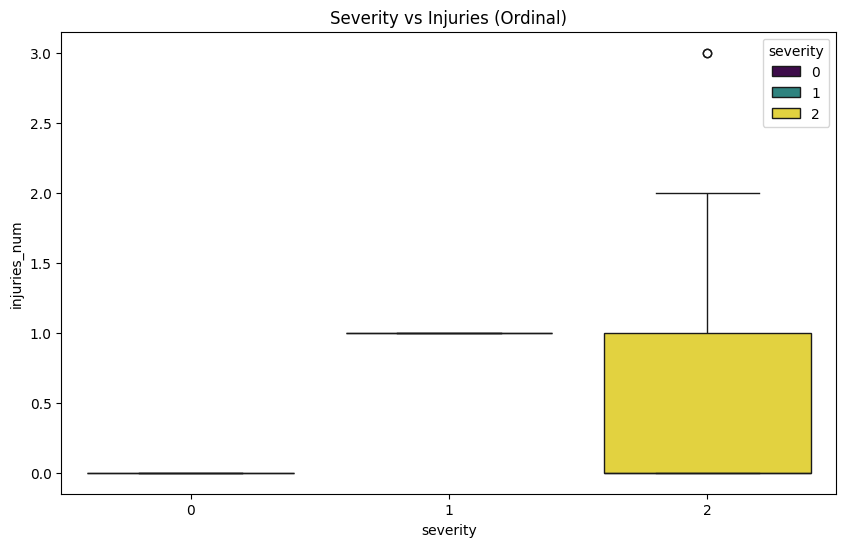

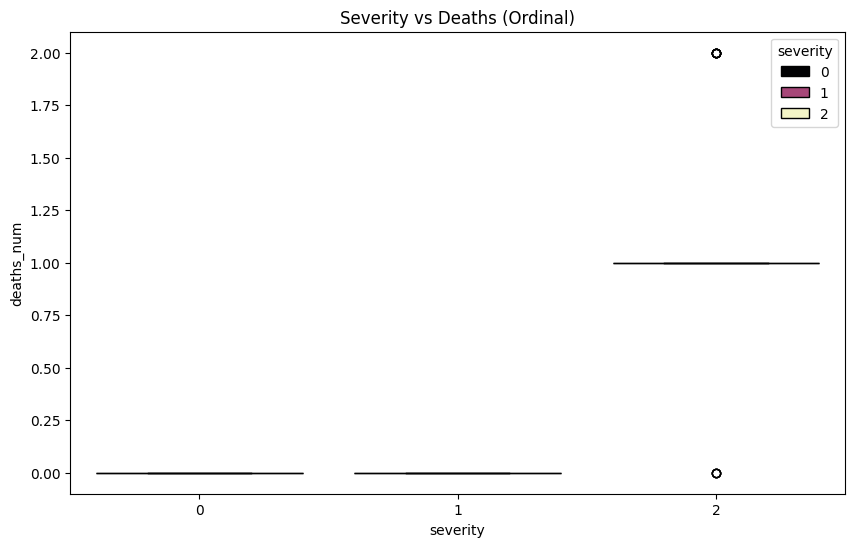

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=data,
    x="severity",
    hue="severity",
    y="injuries_num",
    palette="viridis"
)
plt.title("Severity vs Injuries (Ordinal)")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(
    data=data,
    x="severity",
    hue="severity",
    y="deaths_num",
    palette="magma"
)
plt.title("Severity vs Deaths (Ordinal)")
plt.show()

**Frequency of Incident Types**

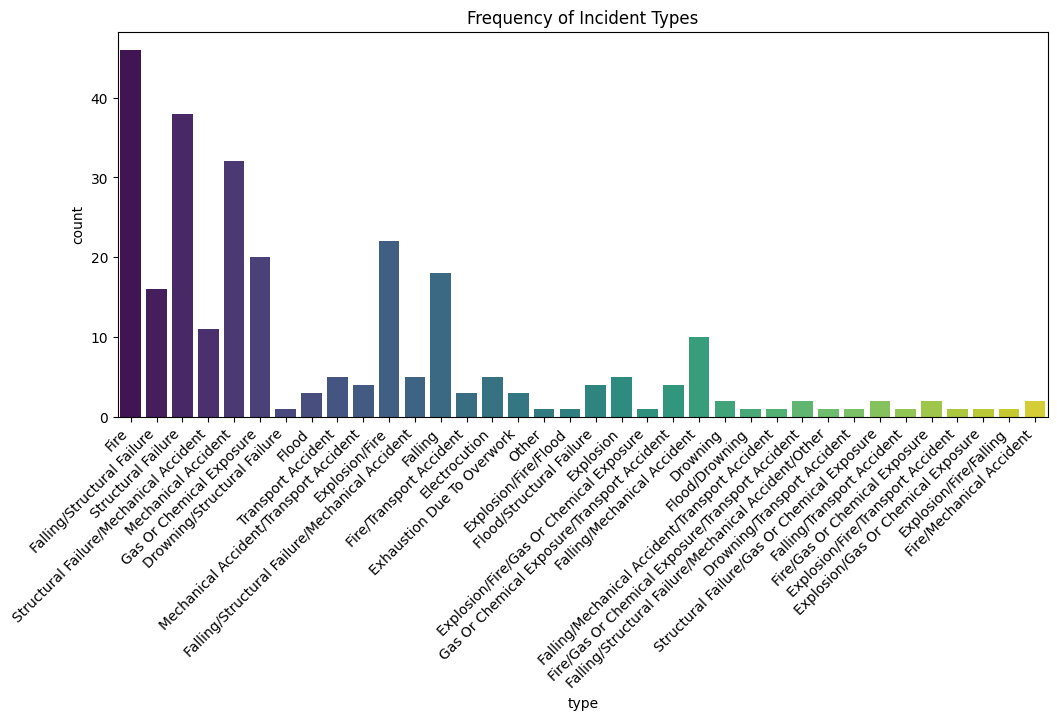

In [40]:
plt.figure(figsize=(12,5))
sns.countplot(data=data, x="type", hue="type", palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Frequency of Incident Types")
plt.show()

**Frequency of Industries**

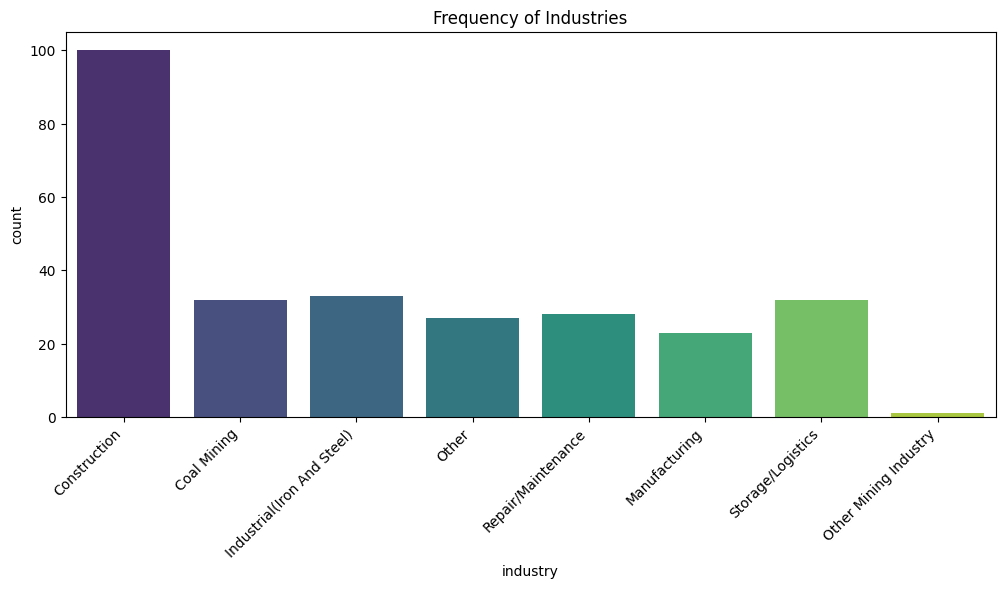

In [41]:
plt.figure(figsize=(12,5))
sns.countplot(data=data, x="industry", hue="industry", palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Frequency of Industries")
plt.show()

**Correlation Heatmap (Numerical Only)**

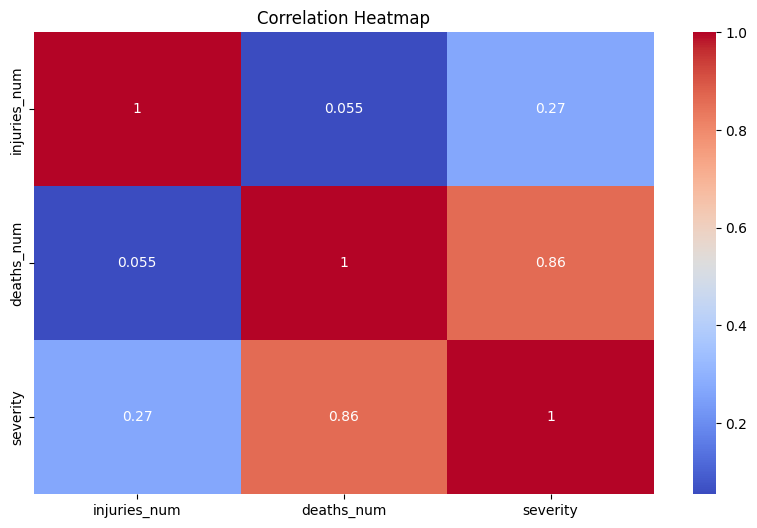

In [43]:
plt.figure(figsize=(10,6))
sns.heatmap(data[["injuries_num", "deaths_num", "severity"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## 4.1 Severity Distribution
The three severity classes are not evenly distributed. High severity (Class 2) forms the largest group, followed by low severity (Class 0). Moderate severity (Class 1) is the smallest. This imbalance is important to recognise, as it may influence model performance and will need to be considered when interpreting results.

## 4.2 Severity by Incident Type
Several incident types appear frequently, including fires, structural failures, mechanical accidents, and transport accidents. These event types also contribute strongly to high-severity cases. Some rare event categories consistently result in severe outcomes, showing that low-frequency events can still have impact. This highlights the importance of not relying only on volume when assessing risk.

## 4.3 Severity by Industry
Construction has the highest number of incidents across all severity groups, which aligns with its known risk profile. Coal mining, industrial (iron and steel), repair/maintenance, manufacturing, and logistics also show a strong presence of severe incidents. These patterns suggest that certain sectors carry consistently higher risk levels.

## 4.4 Injury and Fatality Distributions
Most incidents report no injuries or fatalities. A smaller but important group shows injury ranges of 1–9, 10–29, or even 50+. Fatalities are less frequent but follow a similar pattern, with a concentrated group of high-fatality incidents. This supports the decision to model severity as a three-class problem rather than a binary outcome.

## 4.5 Relationship Between Severity, Injuries, and Deaths
The boxplots confirm that the engineered severity label behaves as expected:
- Severity 0: cases with no injuries and no deaths  
- Severity 1: non-fatal cases with limited injuries  
- Severity 2: cases involving fatalities or high injury counts  

This shows that the severity variable is well-structured and reflects meaningful differences in incident impact.

## 4.6 Correlation Heatmap
The correlation heatmap highlights that:
- Severity is strongly correlated with fatality counts  
- Severity is moderately correlated with injury counts  
- Injuries and deaths themselves have a weak correlation  

This indicates that not all severe events involve both injuries and deaths, which adds nuance to the data and reinforces the usefulness of the three-class formulation.


The EDA shows clear patterns between severity, incident type, and industry. Fatalities appear to be the strongest driver of severity, while certain industries and event categories are consistently linked to more severe outcomes.


#**Step 5: Modelling**

# 5. Modelling

The goal of this step is to build simple classification models that predict incident severity based on industry, incident type, and the ordinal injury and fatality counts. The focus is not on building a highly tuned model, but on applying a clear workflow that links the prepared data to interpretable classifiers.

The feature set is:
- Categorical: `industry`, `type`
- Numeric: `deaths_num`, `injuries_num`
- Target: `severity` (three classes: low, moderate, high)

Models considered:
- Decision Tree
- Naïve Bayes
- K-Nearest Neighbours (KNN)

Categorical variables are one-hot encoded using a `ColumnTransformer`, and the models are wrapped in scikit-learn pipelines. Performance is assessed using accuracy, confusion matrices, and classification reports.


**Define Features, Target, Train/Test Split**

In [44]:
from sklearn.model_selection import train_test_split

# Features and target
categorical_features = ["industry", "type"]
numeric_features = ["deaths_num", "injuries_num"]
target = "severity"

X = data[categorical_features + numeric_features]
y = data[target]

# Train-test split with stratification on severity
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape

((220, 4), (56, 4))

**Preprocessor (One-Hot Encoding)**

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical features, keep numeric as-is
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ],
    remainder="passthrough"
)

**Helper Function for Training & Evaluation**

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def fit_and_evaluate(clf, model_name):
    """
    Fits a pipeline with the shared preprocessor and the given classifier.
    Prints accuracy and classification report, and plots the confusion matrix.
    """
    pipe = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("clf", clf)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"{model_name}")
    print(f"Accuracy: {acc:.3f}\n")
    print("Classification report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=[0,1,2], yticklabels=[0,1,2])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix – {model_name}")
    plt.tight_layout()
    plt.show()

    return pipe, acc

**Model 1: Decision Tree**

Decision Tree
Accuracy: 1.000

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        29

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56



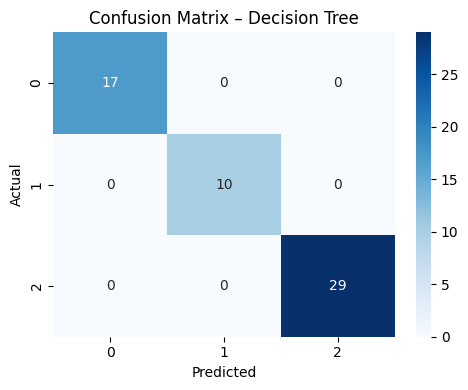

In [50]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

dt_model, dt_acc = fit_and_evaluate(dt_clf, "Decision Tree")

**Model 2: Naïve Bayes**

Naïve Bayes (Multinomial)
Accuracy: 0.893

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.75      0.60      0.67        10
           2       0.87      0.93      0.90        29

    accuracy                           0.89        56
   macro avg       0.87      0.84      0.86        56
weighted avg       0.89      0.89      0.89        56



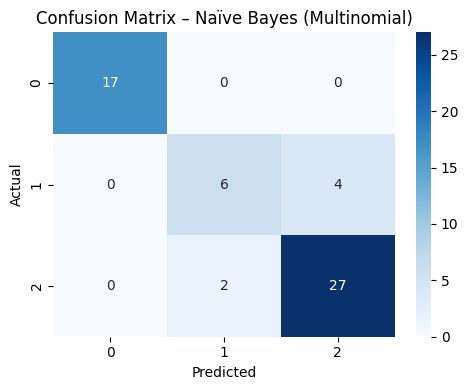

In [51]:
from sklearn.naive_bayes import MultinomialNB

nb_clf = MultinomialNB()

nb_model, nb_acc = fit_and_evaluate(nb_clf, "Naïve Bayes (Multinomial)")

**K-Nearest Neighbours**

K-Nearest Neighbours (k=5)
Accuracy: 0.857

Classification report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        17
           1       0.70      0.70      0.70        10
           2       1.00      0.83      0.91        29

    accuracy                           0.86        56
   macro avg       0.82      0.84      0.83        56
weighted avg       0.88      0.86      0.86        56



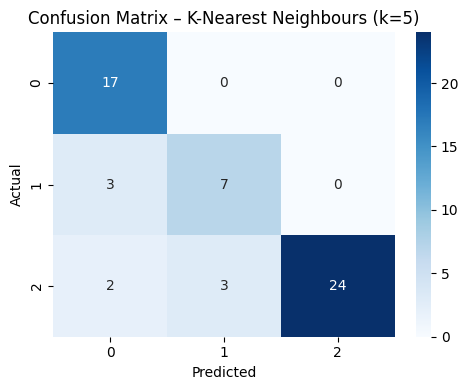

In [52]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(
    n_neighbors=5
)

knn_model, knn_acc = fit_and_evaluate(knn_clf, "K-Nearest Neighbours (k=5)")

**Accuracy Comparison**


Model accuracy comparison:
Decision Tree: 1.000
Naïve Bayes: 0.893
KNN (k=5): 0.857


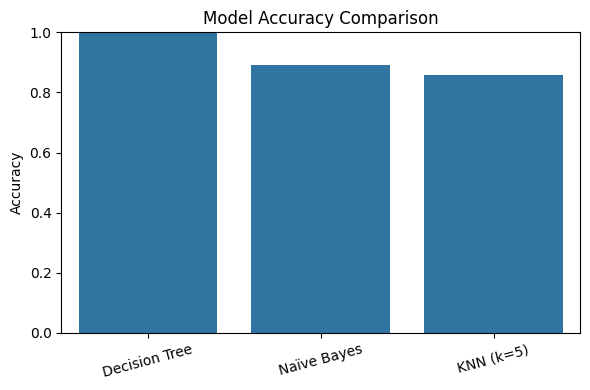

In [53]:
results = {
    "Decision Tree": dt_acc,
    "Naïve Bayes": nb_acc,
    "KNN (k=5)": knn_acc
}

print("\nModel accuracy comparison:")
for name, acc in results.items():
    print(f"{name}: {acc:.3f}")

plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

The modelling step applies three simple classifiers to predict accident severity using the prepared features. The aim was not to optimise the models, but to demonstrate how the processed dataset connects to standard machine learning workflows.

The models evaluated were:
- Decision Tree
- Naïve Bayes (Multinomial)
- K-Nearest Neighbours (k=5)

All models used a shared preprocessing pipeline that one-hot encodes categorical fields and passes numeric variables through unchanged.

## Model Performance

**Decision Tree**
- Accuracy: 1.00
- The tree classified all test observations correctly.
- The confusion matrix shows perfect separation between the three severity classes.

This level of performance is likely due to the clear structure of the engineered severity label and the strong signal in the injury and fatality counts. Decision trees perform well when the rules are straightforward and the relationships between features and target classes are clear.

**Naïve Bayes**
- Accuracy: 0.893
- Performs well on Classes 0 and 2, but struggles with Class 1.
- Some moderate-severity cases (Class 1) are misclassified as high-severity.

This is expected because Naïve Bayes assumes feature independence, which is not always realistic in this dataset. Still, it offers strong performance and fast training time.

**K-Nearest Neighbours (k=5)**
- Accuracy: 0.857
- Performs well on Class 0 and Class 2.
- Shows some misclassification between Classes 1 and 2.

KNN relies on distance in the transformed one-hot encoded feature space, which can be sensitive to class imbalance and sparse inputs. It performs reasonably well but is less reliable compared to the decision tree.


The decision tree performs best because:
- The ordinal injury and fatality values strongly determine the severity classes.
- The splits required to distinguish between the classes are simple.
- There is a clear structure in the dataset that the tree can exploit.

Naïve Bayes and KNN achieve more modest performance, as expected given the mix of categorical and ordinal features.

#**Step 6: Conclusions**

# 6. Conclusions

The project applied the full CRISP-DM lifecycle to a dataset of workplace incidents. The aim was to understand how incident characteristics relate to severity and to build simple models that classify incidents into low, moderate, and high severity categories.

The preparation steps showed the importance of working carefully with real-world data. Several fields required cleaning, standardisation, and restructuring before the dataset could support modelling. Converting injury and fatality ranges into ordinal categories and defining a clear three-class severity label created a structure that could be used consistently across the EDA and modelling phases.

The exploratory analysis highlighted distinct patterns. High-severity incidents were strongly associated with fatality counts, while specific industries and incident types showed a higher concentration of severe cases. These observations aligned with the logic used to engineer the severity classes, and they helped set expectations before modelling.

The modelling results demonstrated that simple classifiers can perform well when the signal in the data is clear. The decision tree achieved perfect accuracy on the test set, showing that the relationships between injury counts, fatality counts, and severity are straightforward for a tree to separate. Naïve Bayes and K-Nearest Neighbours performed well overall but struggled more with the moderate severity class, which is the smallest and most variable group.

This project helped reinforce the steps covered in the course. It showed the value of structuring the work into clear phases, deliberately preparing data, and using simple models to understand the behaviour of the target variable. It also highlighted the need for domain-level judgement when interpreting patterns in safety and incident data. Overall, the project provided practical grounding in the data science lifecycle and laid the foundation for more advanced work that builds on these foundations.